<a href="https://colab.research.google.com/github/satvik-dixit/ML_Forex_Forecasting/blob/main/random_forest_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/satvik-dixit/ML_Forex_Forecasting
! pip install finta


Cloning into 'ML_Forex_Forecasting'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 42 (delta 12), reused 33 (delta 9), pack-reused 0
Receiving objects: 100% (42/42), 45.91 KiB | 2.87 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [ ]:
import sys
sys.path.append('/content/ML_Forex_Forecasting')
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from generate_features import generate_features
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
usd_eur = pd.read_csv("/content/ML_Forex_Forecasting/USDEUR=X.csv", parse_dates=['Date'])
usd_gbp = pd.read_csv("/content/ML_Forex_Forecasting/USDGBP=X.csv", parse_dates=['Date'])
usd_chf = pd.read_csv("/content/ML_Forex_Forecasting/USDCHF=X.csv", parse_dates=['Date'])
eur_gbp = pd.read_csv("/content/ML_Forex_Forecasting/EURGBP=X.csv", parse_dates=['Date'])
eur_chf = pd.read_csv("/content/ML_Forex_Forecasting/EURCHF=X.csv", parse_dates=['Date'])
gbp_chf = pd.read_csv("/content/ML_Forex_Forecasting/GBPCHF=X.csv", parse_dates=['Date'])
print(f"USD/EUR: {usd_eur.shape}")
display(usd_eur.head())
print(f"USD/GBP: {usd_gbp.shape}")
display(usd_gbp.head())
print(f"USD/CHF: {usd_chf.shape}")
display(usd_chf.head())
print(f"EUR/GBP: {eur_gbp.shape}")
display(eur_gbp.head())
print(f"EUR/CHF: {eur_chf.shape}")
display(eur_chf.head())
print(f"GBP/CHF: {gbp_chf.shape}")
display(gbp_chf.head())

USD/EUR: (260, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-07,1.00717,1.00812,0.99950,1.00717,1.00717,0
1,2022-11-08,0.99814,1.00240,0.99067,0.99814,0.99814,0
2,2022-11-09,0.99198,0.99875,0.99120,0.99198,0.99198,0
3,2022-11-10,0.99805,1.00626,0.98203,0.99805,0.99805,0
4,2022-11-11,0.98114,0.98365,0.96727,0.98114,0.98114,0


USD/GBP: (260, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-07,0.88200,0.88532,0.87084,0.88249,0.88249,0
1,2022-11-08,0.86855,0.87479,0.86225,0.86821,0.86821,0
2,2022-11-09,0.86589,0.88034,0.86454,0.86560,0.86560,0
3,2022-11-10,0.87958,0.87989,0.85596,0.87965,0.87965,0
4,2022-11-11,0.85476,0.85845,0.84746,0.85502,0.85502,0


USD/CHF: (261, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-07,0.99674,0.99759,0.98766,0.99674,0.99674,0
1,2022-11-08,0.98888,0.99250,0.98368,0.98888,0.98888,0
2,2022-11-09,0.98445,0.98731,0.98048,0.98445,0.98445,0
3,2022-11-10,0.98350,0.98973,0.96633,0.98350,0.98350,0
4,2022-11-11,0.96491,0.96806,0.94463,0.96491,0.96491,0


EUR/GBP: (261, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-07,0.87614,0.87888,0.87021,0.87614,0.87614,0
1,2022-11-08,0.86979,0.87437,0.86909,0.86979,0.86979,0
2,2022-11-09,0.87253,0.88207,0.87153,0.87253,0.87253,0
3,2022-11-10,0.88130,0.88150,0.87063,0.88130,0.88130,0
4,2022-11-11,0.87131,0.87769,0.87108,0.87131,0.87131,0


EUR/CHF: (261, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-07,0.98930,0.99180,0.98640,0.98930,0.98930,0
1,2022-11-08,0.99080,0.99311,0.98809,0.99080,0.99080,0
2,2022-11-09,0.99241,0.99360,0.98610,0.99241,0.99241,0
3,2022-11-10,0.98546,0.98937,0.98200,0.98546,0.98546,0
4,2022-11-11,0.98345,0.98738,0.97430,0.98345,0.98345,0


GBP/CHF: (261, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-07,1.12934,1.13712,1.12563,1.12934,1.12934,0
1,2022-11-08,1.13888,1.14126,1.13310,1.13888,1.13888,0
2,2022-11-09,1.13713,1.13911,1.11924,1.13713,1.13713,0
3,2022-11-10,1.11779,1.13511,1.11779,1.11779,1.11779,0
4,2022-11-11,1.12853,1.13171,1.11301,1.12853,1.12853,0


In [ ]:
usd_eur_feats = generate_features(usd_eur)
print(f"USD/EUR Features shape: {usd_eur_feats.shape}")
display(usd_eur_feats.head())

usd_gbp_feats = generate_features(usd_gbp)
print(f"USD/GBP Features shape: {usd_gbp_feats.shape}")
display(usd_gbp_feats.head())

usd_chf_feats = generate_features(usd_chf)
print(f"USD/CHF Features shape: {usd_chf_feats.shape}")
display(usd_chf_feats.head())

eur_gbp_feats = generate_features(eur_gbp)
print(f"EUR/GBP Features shape: {eur_gbp_feats.shape}")
display(eur_gbp_feats.head())

eur_chf_feats = generate_features(eur_chf)
print(f"EUR/CHF Features shape: {eur_chf_feats.shape}")
display(eur_chf_feats.head())

gbp_chf_feats = generate_features(gbp_chf)
print(f"GBP/CHF Features shape: {gbp_chf_feats.shape}")
display(gbp_chf_feats.head())

USD/EUR Features shape: (238, 28)


,Date,opt_sine_offset,opt_sine_amp,opt_sine_freq,opt_sine_phase,opt_fourier_offset,opt_fourier_cosamp,opt_fourier_cosfreq,opt_fourier_cosphase,opt_fourier_sinamp,...,ROC1,ROC5,ROC20,WILLIAMS14,RSI14,CMO9,DEMA9,TEMA9,STOCH14,Close
0,2023-11-03,0.945199,0.996826,0.999919,-0.000297,0.946022,0.230960,0.939264,1.043249,0.230263,...,-20.515121,-30.605462,-36.945688,-4956.296806,47.614688,-10.622861,0.012751,0.012366,47.614688,0.94170
1,2023-11-02,0.945213,1.000000,1.000076,0.000419,0.945956,-0.184693,0.994176,0.263142,-0.185466,...,-4.862284,-11.301100,-34.104613,-6049.114317,51.275082,-0.483403,0.013797,0.013742,51.275082,0.94455
2,2023-11-01,0.945341,1.004797,0.999876,-0.000406,0.945648,-0.058054,0.965507,0.226175,0.058802,...,28.064778,11.024778,-39.765380,-5416.442308,52.203439,2.113941,0.013833,0.013741,52.203439,0.94526
3,2023-10-31,0.944310,1.000000,1.000519,-0.004140,0.945353,-0.087002,1.141539,-2.447429,-0.088737,...,-29.144568,73.755839,-51.422551,-5434.918058,48.284815,-9.476169,0.013538,0.013230,48.284815,0.94206
4,2023-10-30,0.943330,1.000000,0.999855,0.002468,0.945023,-0.000623,0.963464,-0.175680,-0.000844,...,1.131208,18.045520,1.578064,-5407.839536,54.348909,7.278908,0.014743,0.014893,54.348909,0.94675


USD/GBP Features shape: (238, 28)


,Date,opt_sine_offset,opt_sine_amp,opt_sine_freq,opt_sine_phase,opt_fourier_offset,opt_fourier_cosamp,opt_fourier_cosfreq,opt_fourier_cosphase,opt_fourier_sinamp,...,ROC1,ROC5,ROC20,WILLIAMS14,RSI14,CMO9,DEMA9,TEMA9,STOCH14,Close
0,2023-11-03,0.823231,1.000000,0.999889,-0.000276,0.821072,-0.179897,0.808378,1.356847,-0.179301,...,-5.995814,-26.636150,-2.674079,-4019.052573,51.687019,-2.674181,0.011982,0.011144,51.687019,0.82022
1,2023-11-02,0.823912,1.000000,0.999851,0.001898,0.820840,-0.229951,0.971252,0.675367,-0.230877,...,-15.772018,-33.001880,-21.844299,-5565.889066,52.602051,-0.170413,0.012854,0.012254,52.602051,0.82087
2,2023-11-01,0.824287,1.000000,1.000006,-0.001609,0.820350,-0.496679,0.733868,-2.219949,0.495984,...,7.698167,5.405009,-28.058963,-5552.070142,55.448772,7.610794,0.013724,0.013478,55.448772,0.82290
3,2023-10-31,0.822878,1.012431,1.000526,-0.003502,0.819682,-0.184176,0.902304,3.676040,-0.183467,...,-22.802298,90.273742,-29.786916,-4668.491160,54.410493,4.577080,0.013890,0.013795,54.410493,0.82198
4,2023-10-30,0.822007,1.000000,0.999801,0.001999,0.819137,0.195531,0.896475,0.360256,-0.195919,...,11.446346,28.249767,53.111019,-4557.113811,59.337534,17.951895,0.014544,0.014910,59.337534,0.82551


USD/CHF Features shape: (239, 28)


,Date,opt_sine_offset,opt_sine_amp,opt_sine_freq,opt_sine_phase,opt_fourier_offset,opt_fourier_cosamp,opt_fourier_cosfreq,opt_fourier_cosphase,opt_fourier_sinamp,...,ROC1,ROC5,ROC20,WILLIAMS14,RSI14,CMO9,DEMA9,TEMA9,STOCH14,Close
0,2023-11-04,0.904953,1.000000,1.000124,0.000366,0.905610,1.241745,1.072515,-1.264609,1.242238,...,302.842777,72.601264,6332.157036,-4222.783859,45.974653,-12.086767,-0.006254,-0.005267,45.974653,0.89770
1,2023-11-03,0.904123,1.000000,1.000192,-0.003185,0.905757,0.002466,0.847524,2.169895,0.002331,...,-16.547741,-72.383565,-174.636837,-4184.304702,55.677407,14.462076,-0.003995,-0.001531,55.677407,0.90610
2,2023-11-02,0.901706,1.000000,1.000731,-0.003333,0.905607,0.262515,0.843025,-2.299338,-0.262998,...,-458.822799,-72.697602,-142.962702,-4186.824171,55.101292,12.912282,-0.005114,-0.002340,55.101292,0.90555
3,2023-11-01,0.898767,1.000000,1.000392,-0.003243,0.905264,-0.044819,1.006512,0.490528,-0.044918,...,-113.594395,-105.857469,-92.342412,-4167.355550,60.769002,29.190840,-0.006442,-0.003422,60.769002,0.90980
4,2023-10-31,0.896256,1.018195,1.000557,-0.003197,0.904894,0.150084,1.264603,0.374426,0.150191,...,5.252006,-62.713023,-175.487508,-4330.721382,52.507979,7.281077,-0.010447,-0.008514,52.507979,0.90206


EUR/GBP Features shape: (239, 28)


,Date,opt_sine_offset,opt_sine_amp,opt_sine_freq,opt_sine_phase,opt_fourier_offset,opt_fourier_cosamp,opt_fourier_cosfreq,opt_fourier_cosphase,opt_fourier_sinamp,...,ROC1,ROC5,ROC20,WILLIAMS14,RSI14,CMO9,DEMA9,TEMA9,STOCH14,Close
0,2023-11-04,0.870904,1.000000,1.000037,-0.000015,0.867815,0.419350,1.158712,-0.426785,0.419439,...,-666.505625,-286.624073,-43.385386,-9526.733903,47.994844,-11.584598,-0.000360,-0.001362,47.994844,0.86707
1,2023-11-03,0.870947,1.000000,0.999947,-0.000017,0.867811,-0.011513,1.021695,1.699038,-0.011276,...,-144.593888,184.488514,-111.272065,-7157.650294,56.730784,11.865286,0.001009,0.000453,56.730784,0.87077
2,2023-11-02,0.871637,0.996344,0.999789,0.001560,0.867625,-0.050046,1.062432,-5.339855,0.049902,...,-356.602432,-144.536894,-72.966294,-7172.380245,52.854249,0.285988,0.001040,0.000458,52.854249,0.86897
3,2023-11-01,0.871884,0.989384,1.000117,-0.001315,0.867397,-0.107403,1.039432,0.786552,-0.107570,...,-77.798429,-46.987649,-113.881337,-7158.223125,57.447552,13.144303,0.001957,0.001801,57.447552,0.87070
4,2023-10-31,0.871353,1.000000,1.000087,0.000039,0.867143,-0.106450,1.040746,0.415297,-0.106924,...,29.671229,218.935242,-162.883984,-6659.304850,62.395395,27.615052,0.002325,0.002498,62.395395,0.87240


EUR/CHF Features shape: (239, 28)


,Date,opt_sine_offset,opt_sine_amp,opt_sine_freq,opt_sine_phase,opt_fourier_offset,opt_fourier_cosamp,opt_fourier_cosfreq,opt_fourier_cosphase,opt_fourier_sinamp,...,ROC1,ROC5,ROC20,WILLIAMS14,RSI14,CMO9,DEMA9,TEMA9,STOCH14,Close
0,2023-11-04,0.958614,1.000000,1.000522,-0.002749,0.957399,0.100223,1.138774,-3.065600,0.101553,...,-14.374131,-46.493567,-22.202074,-4267.028727,60.493388,29.135814,-0.015226,-0.012313,60.493388,0.96398
1,2023-11-03,0.956503,1.000000,1.000285,-0.003062,0.957482,0.001027,1.193785,-1.518097,-0.000812,...,-18.059877,-45.829415,4.881698,-4276.199033,58.312440,23.856903,-0.017474,-0.014512,58.312440,0.96188
2,2023-11-02,0.953924,1.002997,1.000698,-0.003977,0.957282,-0.062039,1.020789,-0.485885,-0.062539,...,26.904722,-38.602489,33.859930,-4613.497547,54.756242,15.132448,-0.019625,-0.016639,54.756242,0.95866
3,2023-11-01,0.950673,1.000000,1.000542,-0.003011,0.957335,-0.049521,1.054781,0.573885,-0.048820,...,-25.975287,-53.661696,14.321077,-4668.783836,60.369975,30.989510,-0.021063,-0.017779,60.369975,0.96244
4,2023-10-31,0.949086,1.000000,1.000065,0.000835,0.957223,-0.001675,1.153613,-2.387419,0.000493,...,-18.819843,-27.196450,30.717145,-4756.905373,54.751880,17.681247,-0.024998,-0.022646,54.751880,0.95751


GBP/CHF Features shape: (239, 28)


,Date,opt_sine_offset,opt_sine_amp,opt_sine_freq,opt_sine_phase,opt_fourier_offset,opt_fourier_cosamp,opt_fourier_cosfreq,opt_fourier_cosphase,opt_fourier_sinamp,...,ROC1,ROC5,ROC20,WILLIAMS14,RSI14,CMO9,DEMA9,TEMA9,STOCH14,Close
0,2023-11-04,1.100596,1.005714,1.000547,-0.003069,1.103061,0.172681,1.140255,-3.014862,0.174627,...,-41.756871,-64.919858,-10.118618,-3339.066548,60.219154,31.373237,-0.016881,-0.012237,60.219154,1.11180
1,2023-11-03,1.098108,1.005885,1.000397,-0.003563,1.103094,0.116590,1.151331,0.736755,0.116714,...,-7.844650,-44.392759,74.801233,-3384.131775,54.088195,16.722381,-0.021265,-0.017148,54.088195,1.10454
2,2023-11-02,1.094267,1.559925,1.000684,-0.004143,1.103182,-0.001052,0.890391,1.927215,0.002068,...,13.472582,-48.671849,95.783053,-4093.688970,52.708517,13.327550,-0.023788,-0.019611,52.708517,1.10306
3,2023-11-01,1.090227,1.003856,1.000474,-0.001870,1.103421,0.077613,0.942221,0.545523,0.077575,...,-32.237870,-53.759613,73.076586,-3807.505453,55.032730,19.990483,-0.026590,-0.022599,55.032730,1.10530
4,2023-10-31,1.089054,1.000000,0.999972,0.000913,1.103683,0.322712,1.218012,-4.803268,0.323477,...,-15.000159,-20.275302,101.673794,-3592.988154,47.431895,1.605056,-0.031605,-0.029108,47.431895,1.09739


In [ ]:
def random_forest_prediction_plot(dataset):
    data = dataset.copy()
    data = data.iloc[::-1]
    forecast_days = 5

    for i in range(1, forecast_days + 1):
        data[f'close_t-{i}'] = data['Close'].shift(i)
    data.dropna(inplace=True)

    X = data.drop(columns=['Close', 'Date', 't'])
    y = data['Close']

    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }

    rf_model = RandomForestRegressor(random_state=0)

    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    best_rf_model = grid_search.best_estimator_

    actual_prices = list(y[-forecast_days:])
    last_observation = X.iloc[-1]
    forecast = []

    for _ in range(forecast_days):
        prediction = best_rf_model.predict([last_observation])[0]
        forecast.append(prediction)
        last_observation = last_observation.shift(periods=-1)
        last_observation[-1] = prediction

    next_5_predictions = []
    for _ in range(forecast_days):
        prediction = best_rf_model.predict([last_observation])[0]
        next_5_predictions.append(prediction)
        last_observation = last_observation.shift(periods=-1)
        last_observation[-1] = prediction

    mse = mean_squared_error(y[-forecast_days:], forecast)
    print('MSE for 5 days:', mse)

    return actual_prices, forecast, next_5_predictions


In [ ]:
import matplotlib.pyplot as plt

def plot(actual, forecast):
    plt.figure(figsize=(10, 6))
    plt.plot([1, 2, 3, 4, 5], forecast, label='Predicted')
    plt.plot([1, 2, 3, 4, 5], actual, label='Actual')
    plt.xlabel('Date')
    plt.ylabel('Exchange Rate')
    plt.title('Exchange Rate Forecast')
    plt.legend()


MSE for 5 days: 0.0002971499923693277


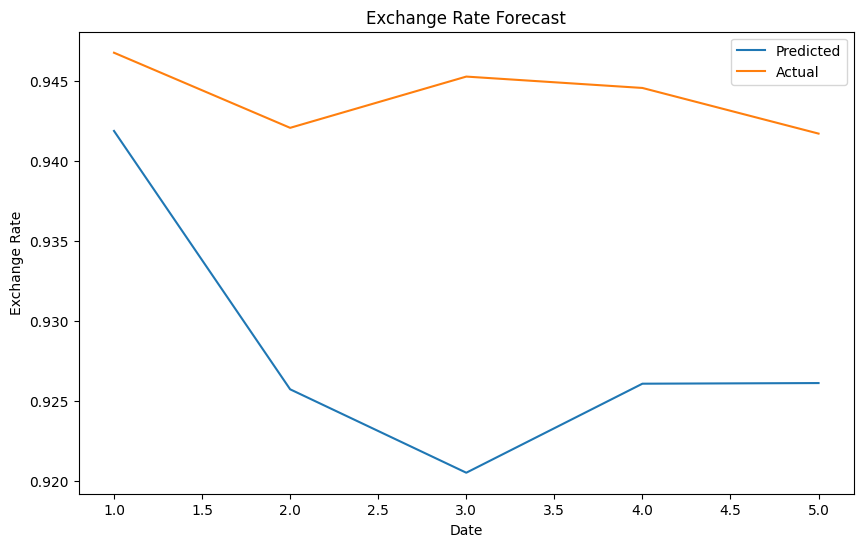

In [ ]:
conversion_rates = np.zeros((5, 6))

actual, forecast, next_5 = random_forest_prediction_plot(usd_eur_feats)
plot(actual, forecast)
conversion_rates[:, 0] = next_5

MSE for 5 days: 0.00017897835596800195


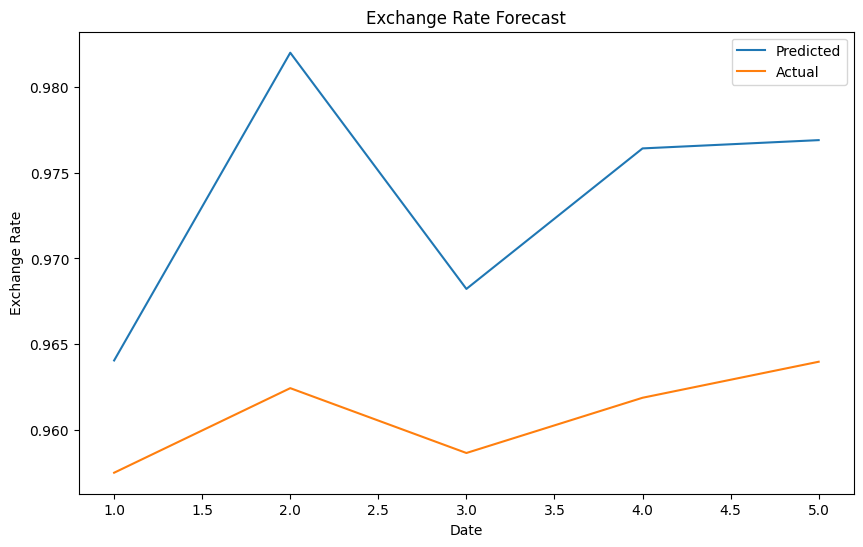

In [ ]:
actual, forecast, next_5 = random_forest_prediction_plot(eur_chf_feats)
plot(actual, forecast)
conversion_rates[:, 1] = next_5

MSE for 5 days: 1.838172532949699e-05


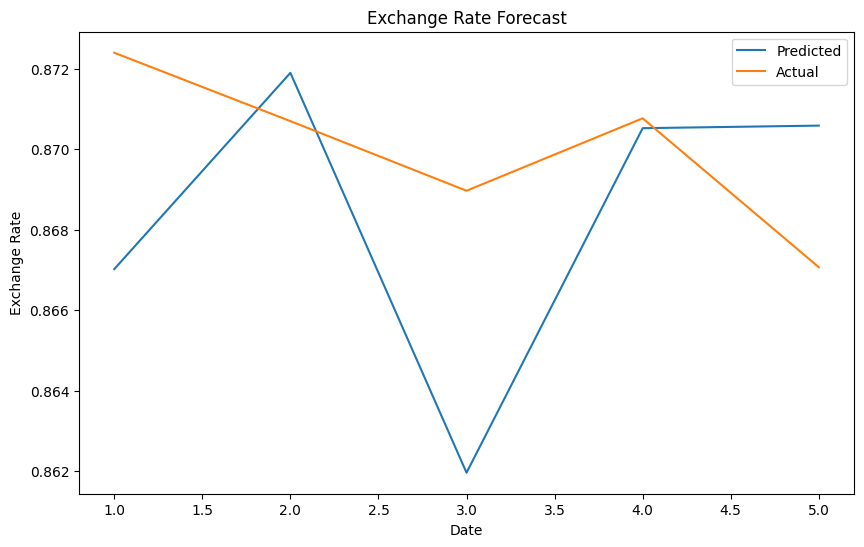

In [ ]:
actual, forecast, next_5 = random_forest_prediction_plot(eur_gbp_feats)
plot(actual, forecast)
conversion_rates[:, 2] = next_5

MSE for 5 days: 0.00019786386626554484


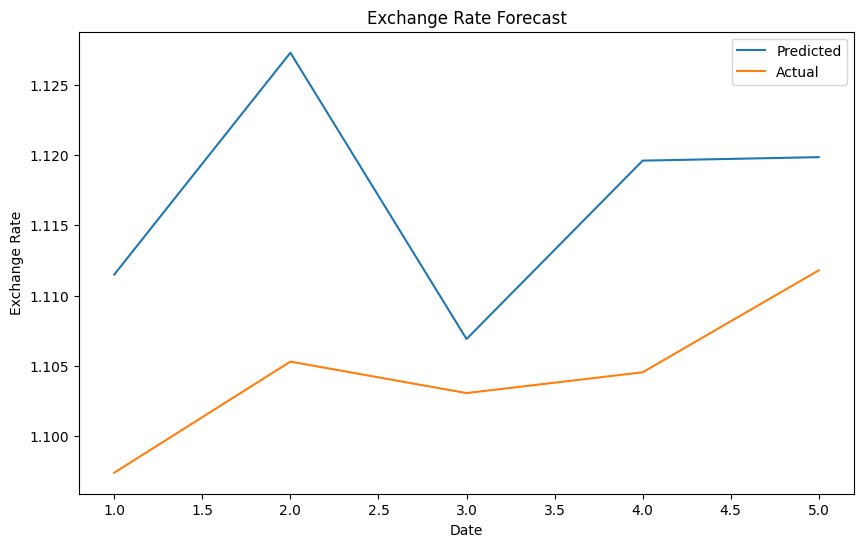

In [ ]:
actual, forecast, next_5 = random_forest_prediction_plot(gbp_chf_feats)
plot(actual, forecast)
conversion_rates[:, 3] = next_5

MSE for 5 days: 8.108204621043303e-05


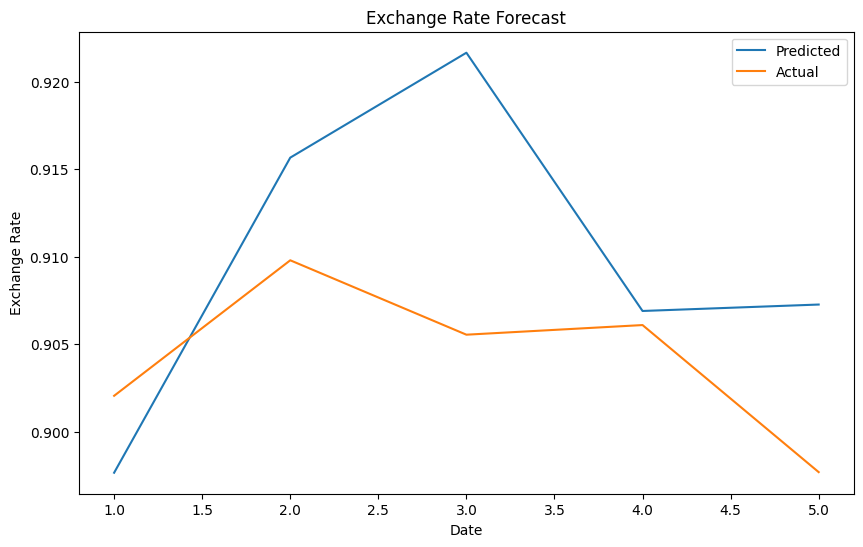

In [ ]:
actual, forecast, next_5 = random_forest_prediction_plot(usd_chf_feats)
plot(actual, forecast)
conversion_rates[:, 4] = next_5

MSE for 5 days: 0.00026600911334469734


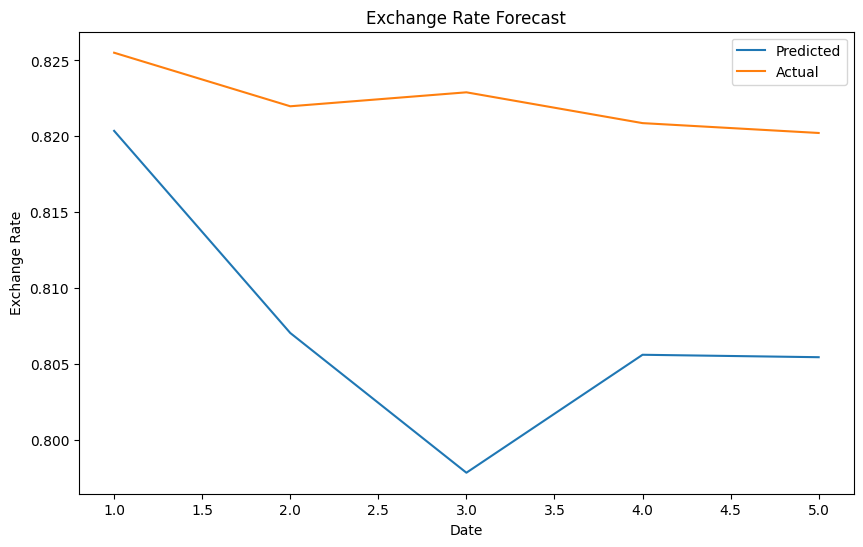

In [ ]:
actual, forecast, next_5 = random_forest_prediction_plot(usd_gbp_feats)
plot(actual, forecast)
conversion_rates[:, 5] = next_5

In [ ]:
print(conversion_rates)

[[0.9260678  0.9766729  0.8705403  1.12022375 0.86620062 0.8054877 ]
 [0.95195733 1.0025736  0.8916697  1.14600095 0.93957522 0.8398688 ]
 [0.89552307 0.9777694  0.85251655 1.11893175 0.8672504  0.77038437]
 [0.9417724  0.9647045  0.87574935 1.10363273 0.91736945 0.82620994]
 [0.93117983 0.976762   0.87024775 1.12222605 0.9102411  0.80998495]]


In [ ]:
def find_maximum_profit_path(conversion_rates):

    dp = []
    path = []

    curr = ['USD', 'EUR', 'CHF', 'GBP']
    prev_day = np.array([1, 0, 0, 0])

    for i in range(5):

        USD, EUR, CHF, GBP = prev_day
        USD_EUR, EUR_CHF, EUR_GBP, GBP_CHF, USD_CHF, USD_GBP = conversion_rates[i, :]
        EUR_USD, CHF_EUR, GBP_EUR, CHF_GBP, CHF_USD, GBP_USD = 1/conversion_rates[i, :]

        if i<=3:
            dp = np.array([max(USD*1, EUR*EUR_USD, CHF*CHF_USD, GBP*GBP_USD), max(USD*USD_EUR, EUR*1, CHF*CHF_EUR, GBP*GBP_EUR), max(USD*USD_CHF, EUR*EUR_CHF, CHF*1, GBP*GBP_CHF), max(USD*USD_GBP, EUR*EUR_GBP, CHF*CHF_GBP, GBP*1)])
            path.append(np.array([curr[np.argmax([USD*1, EUR*EUR_USD, CHF*CHF_USD, GBP*GBP_USD])], curr[np.argmax([USD*USD_EUR, EUR*1, CHF*CHF_EUR, GBP*GBP_EUR])], curr[np.argmax([USD*USD_CHF, EUR*EUR_CHF, CHF*1, GBP*GBP_CHF])], curr[np.argmax([USD*USD_GBP, EUR*EUR_GBP, CHF*CHF_GBP, GBP*1])]]))
            prev_day = dp

        elif i==4:
            dp = np.array([USD*1, EUR*EUR_USD, CHF*CHF_USD, GBP*GBP_USD])
            path.append(curr)

    final_path = ['USD']
    index = curr.index(path[-1][np.argmax(dp)])
    print(1000*np.max(dp))

    for i in range(4, -1, -1):
        prev_currency = path[i][index]
        final_path.append(prev_currency)
        index = curr.index(prev_currency)

    final_path.reverse()
    final_path = [final_path[i] + '-' + final_path[i+1] for i in range(5)]

    return final_path

In [ ]:
final_path = find_maximum_profit_path(conversion_rates)
print(final_path)

1112.0324263565863
['USD-USD', 'USD-GBP', 'GBP-USD', 'USD-GBP', 'GBP-USD']
